# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - CONTAGEM_CP_ANO_MUN


In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4712100,3849
1,2023,4321500,5453
2,2023,8599604,8877
3,2023,4617600,9051
4,2023,8230001,7225
...,...,...,...
56520613,1901,8411600,3473
56520614,1899,6462000,7107
56520615,1893,8413200,4123
56520616,1891,1321900,4675


In [3]:
# CONTAGEM_CP_ANO_MUN
# Contagem de quantos CNAEs novos por município: filtrar:
# ano > município > contagem CNAEs existentes
# Quanto mais CNAEs (maior contagem), mais desenvolvido será o município no ano avaliado

# Primeiro, criamos um DataFrame temporário com a contagem de 'CNAE_FISCAL_PRINCIPAL' por 'ANO' e 'MUNICÍPIO'
df_contagem_por_municipio = df.groupby(['DATA_DE_INÍCIO_ATIVIDADE', 'MUNICÍPIO'])['CNAE_FISCAL_PRINCIPAL'].count().reset_index(name='CONTAGEM_CP_ANO_MUN')

# Em seguida, fundimos os dados de contagem ao DataFrame original usando 'ANO' e 'MUNICÍPIO' como chaves de junção
df = df.merge(df_contagem_por_municipio, on=['DATA_DE_INÍCIO_ATIVIDADE', 'MUNICÍPIO'], how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,2023,4712100,3849,20409
1,2023,4321500,5453,1638
2,2023,8599604,8877,1916
3,2023,4617600,9051,8347
4,2023,8230001,7225,1315
...,...,...,...,...
56520613,1901,8411600,3473,1
56520614,1899,6462000,7107,1
56520615,1893,8413200,4123,1
56520616,1891,1321900,4675,1


In [4]:
# EXCLUINDO AS INFORMAÇÕES NÃO NECESSÁRIAS AO MODELO:
df = df.drop(['DATA_DE_INÍCIO_ATIVIDADE'], axis=1)
df

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,4712100,3849,20409
1,4321500,5453,1638
2,8599604,8877,1916
3,4617600,9051,8347
4,8230001,7225,1315
...,...,...,...
56520613,8411600,3473,1
56520614,6462000,7107,1
56520615,8413200,4123,1
56520616,1321900,4675,1


In [5]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'CONTAGEM_CP_ANO_MUN']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,4712100,3849,20409
1,4321500,5453,1638
2,8599604,8877,1916
3,4617600,9051,8347
4,8230001,7225,1315
...,...,...,...
56520613,8411600,3473,1
56520614,6462000,7107,1
56520615,8413200,4123,1
56520616,1321900,4675,1


In [6]:
# Realize a amostragem aleatória simples com 0,01% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
40516950,6201501,6001,18271
46647478,4617600,9487,276
40083955,8291100,2381,1339
43535496,4639701,4371,2121
25285018,1412602,255,13366
...,...,...,...
13669561,6203100,4123,69600
39108389,4530703,2531,5748
23011088,4929901,7107,192748
44680783,7112000,7535,12326


In [7]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["CONTAGEM_CP_ANO_MUN", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 7


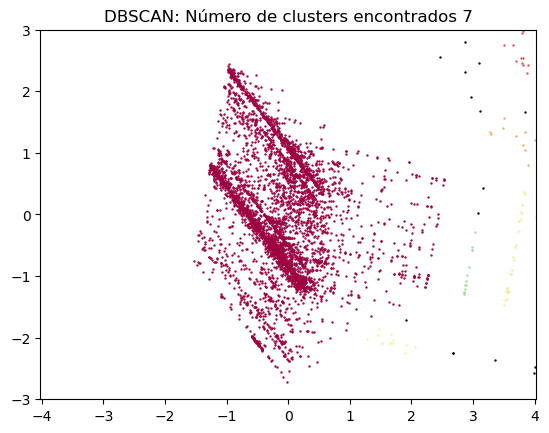

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()
